In [1]:
import idx2numpy
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,BatchNormalization
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.optimizers import SGD

from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.preprocessing.image import img_to_array

In [2]:
# loading data set

In [3]:
train_data = 'mnist/train-images.idx3-ubyte'
train_labels = 'mnist/train-labels.idx1-ubyte'

test_data = 'mnist/t10k-images.idx3-ubyte'
test_labels= 'mnist/t10k-labels.idx1-ubyte'

In [4]:
train_data_arr = idx2numpy.convert_from_file(train_data)
train_lables_arr=  idx2numpy.convert_from_file(train_labels)

test_data_arr = idx2numpy.convert_from_file(test_data)
test_lables_arr=  idx2numpy.convert_from_file(test_labels)

In [5]:
print("shape of training data is {}".format(train_data_arr .shape))
print("shape of testing data is {}".format(test_data_arr .shape))

shape of training data is (60000, 28, 28)
shape of testing data is (10000, 28, 28)


In [6]:
#reshaping the training data

In [7]:
train_data_arr_reshaped = train_data_arr.reshape((train_data_arr.shape[0],28,28,1))
test_data_arr_reshaped = test_data_arr.reshape((test_data_arr.shape[0],28,28,1))

In [8]:
print("reshape of training data is {}".format(train_data_arr_reshaped.shape))
print("reshape of testing data is {}".format(test_data_arr_reshaped.shape))

reshape of training data is (60000, 28, 28, 1)
reshape of testing data is (10000, 28, 28, 1)


In [9]:
# one hot encode target values

In [10]:
print("shape of training lebels is {}".format(train_lables_arr.shape))
print("shape of testing lables is {}".format(test_lables_arr.shape))

shape of training lebels is (60000,)
shape of testing lables is (10000,)


In [11]:
train_lables_onehot = to_categorical(train_lables_arr)
test_lables_onehot = to_categorical(test_lables_arr)

In [12]:
print("onehot encoded  training lebels is {}".format(train_lables_onehot.shape))
print("onehot encoded testing lables is {}".format(test_lables_onehot.shape))

onehot encoded  training lebels is (60000, 10)
onehot encoded testing lables is (10000, 10)


In [13]:
# preprocessing : scaling/normalizing images

In [14]:
train_data_arr_reshaped_float=train_data_arr_reshaped.astype('float32')
test_data_arr_reshaped_float=test_data_arr_reshaped.astype('float32')

In [25]:
train_data_arr_reshaped_scaled=train_data_arr_reshaped_float/ 255
test_data_arr_reshaped_scaled=test_data_arr_reshaped_float/ 255

In [16]:
# defining model

In [17]:
model = Sequential()
model.add(Conv2D(32,(3,3),activation='relu', kernel_initializer='he_uniform',input_shape= (28,28,1)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(100, activation='relu', kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Dense(10, activation='softmax'))

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 100)               160100    
_________________________________________________________________
batch_normalization (BatchNo (None, 100)               4

In [19]:
# compiling model

In [20]:
opt = SGD(lr=0.01, momentum=0.9)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

In [21]:
# prepare cross validation
kfold = KFold(5, shuffle=True, random_state=1)

In [27]:
scores, histories = list(), list()
for train_ix, test_ix in kfold.split(train_data_arr_reshaped_scaled):
    trainX, trainY, testX, testY = train_data_arr_reshaped_scaled[train_ix],train_lables_onehot[train_ix], train_data_arr_reshaped_scaled[test_ix],train_lables_onehot[test_ix]
    history = model.fit(trainX, trainY, epochs=10, batch_size=32, validation_data=(testX, testY), verbose=0)
    _, acc = model.evaluate(testX, testY, verbose=0)
    scores.append(acc)
    histories.append(history)

In [28]:
scores

[0.9854999780654907, 0.9942499995231628, 0.999666690826416, 1.0, 1.0]

In [ ]:
#  results

<ipython-input-29-c0fd4d5b0dde>:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(1, 1, 1)


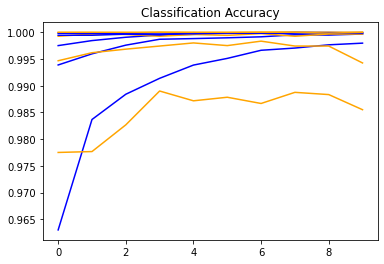

In [29]:
for i in range(len(histories)):
    # plot accuracy
    plt.subplot(1, 1, 1)
    plt.title('Classification Accuracy')
    plt.plot(histories[i].history['accuracy'], color='blue', label='train')
    plt.plot(histories[i].history['val_accuracy'], color='orange', label='test')
plt.show()

In [30]:
model.save('final_model.h5')

In [31]:
# model evaluation

In [32]:
_, acc = model.evaluate(testX, testY, verbose=0)
print('> %.3f' % (acc * 100.0))

> 100.000


In [33]:
# prediction

In [34]:
sample=test_data_arr_reshaped_scaled[1000].reshape(1, 28, 28, 1)

In [35]:
digit = model.predict_classes(sample)
digit

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([9], dtype=int64)

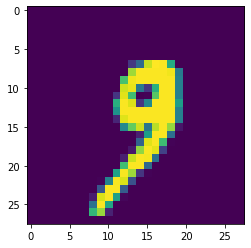

In [36]:
plt.imshow(test_data_arr_reshaped_scaled[1000])